In [27]:
import requests
import pandas as pd
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [15]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [16]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-08-11 18:35:42.266178')

In [20]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [21]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

In [22]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-08-11 19:00:00,24348,24358,24098,24165,113.081421,2.732862e+06
2022-08-11 20:00:00,24165,24240,24095,24240,49.681265,1.199848e+06
2022-08-11 21:00:00,24242,24250,24050,24219,64.664565,1.560619e+06
2022-08-11 22:00:00,24222,24345,24063,24203,80.366212,1.944572e+06
2022-08-11 23:00:00,24196,24227,23907,23907,94.244460,2.263769e+06


<AxesSubplot:xlabel='CloseTime'>

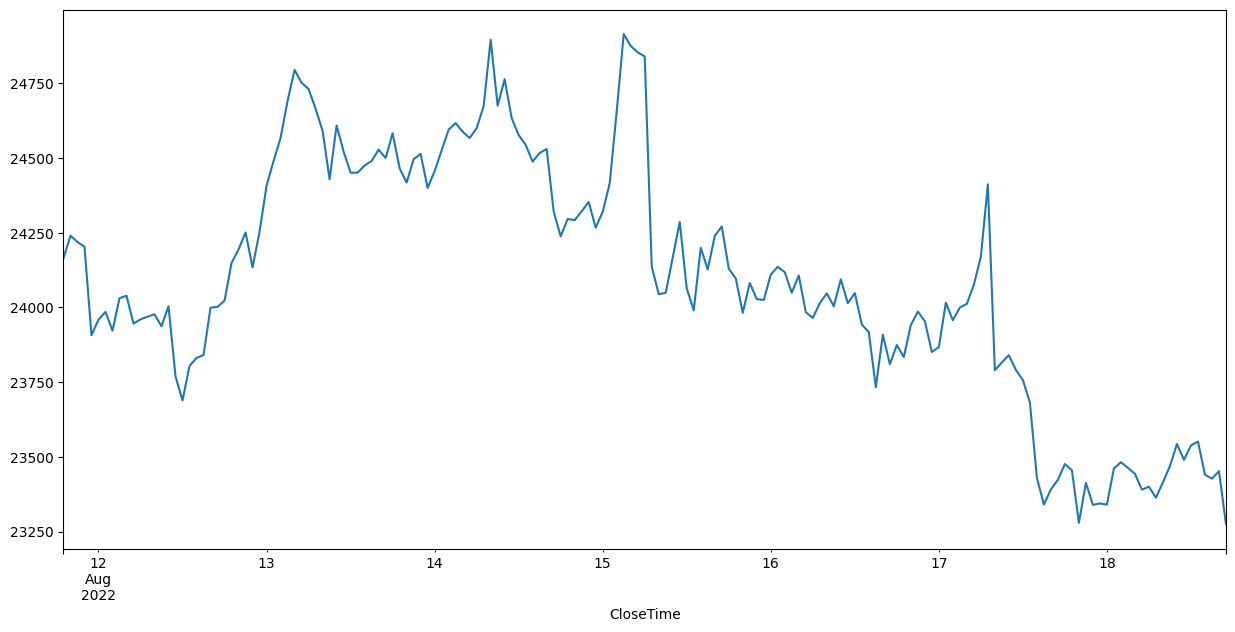

In [23]:
btc['ClosePrice'].plot(figsize=(15, 7))

<AxesSubplot:xlabel='CloseTime'>

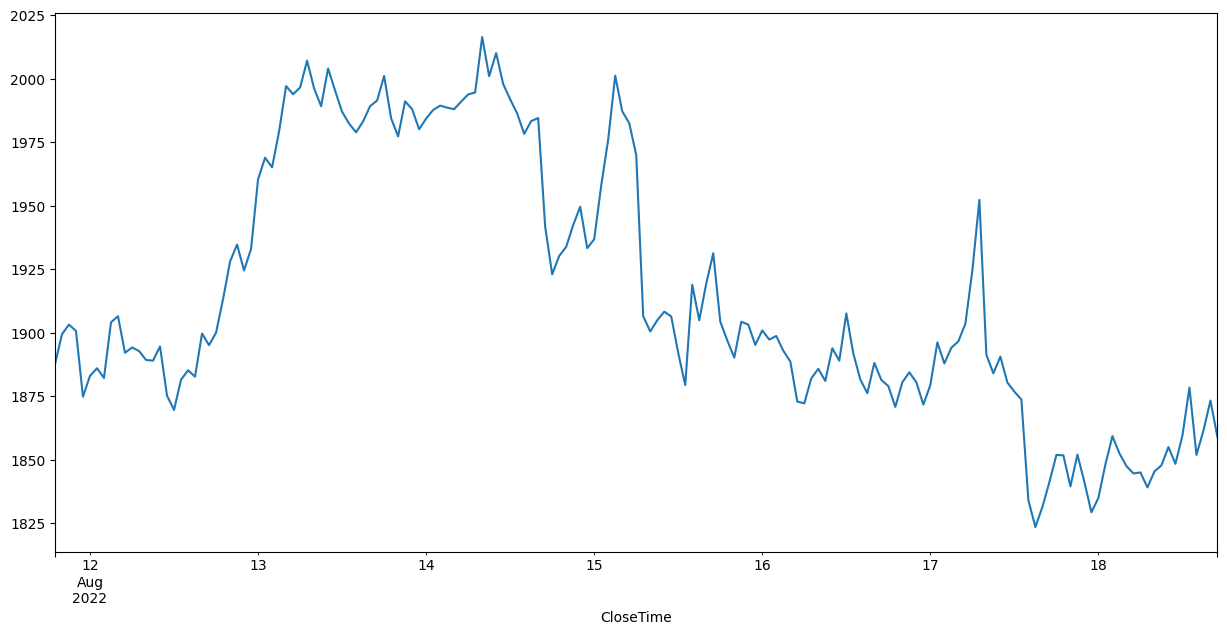

In [24]:
eth['ClosePrice'].plot(figsize=(15, 7))

In [28]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'
p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')
p1.legend.location = "top_left"
show(p1)

In [ ]:
writer = pd.ExcelWriter('cryptos.xlsx')
btc.to_excel(writer, sheet_name='Bitcoin')
eth.to_excel(writer, sheet_name='Ether')
writer.save()